In [147]:
import pandas as pd
import numpy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import os
os.getcwd()

'C:\\Users\\hp\\OneDrive\\Desktop\\Data_Analysis\\FandagoMovieRatings'

In [148]:
pd.options.display.max_columns = 999
fandango_before=pd.read_csv(
    'C:\\Users\\hp\\OneDrive\\Desktop\\Data_Analysis\\FandagoMovieRatings\\fandango_score_comparison.csv',
engine='python')
fandango_after=pd.read_csv(
    'C:\\Users\\hp\\OneDrive\\Desktop\\Data_Analysis\\FandagoMovieRatings\\movie_ratings_16_17.csv',
engine='python')
display(fandango_before.head())
print('\n')
display(fandango_after.head())

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [149]:

fandango_before =fandango_before [['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after =fandango_after[['movie', 'year', 'fandango']].copy()

display(fandango_before.head(3))
display(fandango_after.head(3))

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [150]:
fandango_before['FILM'].value_counts()

Mr. Holmes (2015)                               1
The Gift (2015)                                 1
About Elly (2015)                               1
Wild Tales (2014)                               1
What We Do in the Shadows (2015)                1
                                               ..
The Second Best Exotic Marigold Hotel (2015)    1
Mortdecai (2015)                                1
Fifty Shades of Grey (2015)                     1
I'll See You In My Dreams (2015)                1
The Divergent Series: Insurgent (2015)          1
Name: FILM, Length: 146, dtype: int64

In [151]:
fandango_before['FILM']=fandango_before['FILM'].str.extract('(\d+)')
fandango_before['FILM'].value_counts()

2015    115
2014     17
2         6
3         2
5         1
44        1
47        1
71        1
100       1
7         1
Name: FILM, dtype: int64

In [152]:
fandango_before['FILM']=fandango_before.loc[fandango_before['FILM']=='2015']
fandango_before['FILM'].value_counts()

2015    115
Name: FILM, dtype: int64

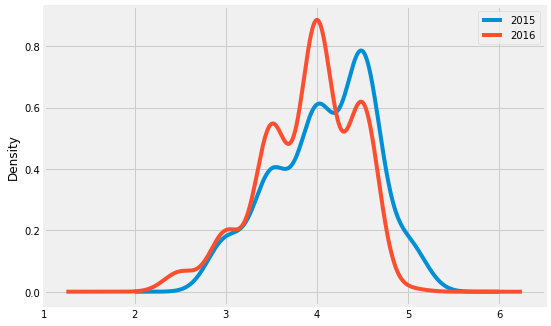

In [153]:

fandango_before['Fandango_Stars'].plot.kde(label='2015',legend=True,figsize = (8,5.5))
fandango_after['fandango'].plot.kde(label='2016',legend=True)

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015

In [154]:
mean_2015=fandango_before['Fandango_Stars'].mean()
mean_2016=fandango_after['fandango'].mean()

mode_2015=fandango_before['Fandango_Stars'].mode()
mode_2016=fandango_after['fandango'].mode()

median_2015=fandango_before['Fandango_Stars'].median()
median_2016=fandango_after['fandango'].median()

In [155]:
summary_stats=pd.DataFrame()
summary_stats['2015']=[mean_2015, median_2015, mode_2015]
summary_stats['2016']=[mean_2016, median_2016, mode_2016]
summary_stats.index=['mean','median','mode']
summary_stats

,2015,2016
mean,4.08904,3.89486
median,4,4
mode,0 4.5 dtype: float64,0 4.0 dtype: float64


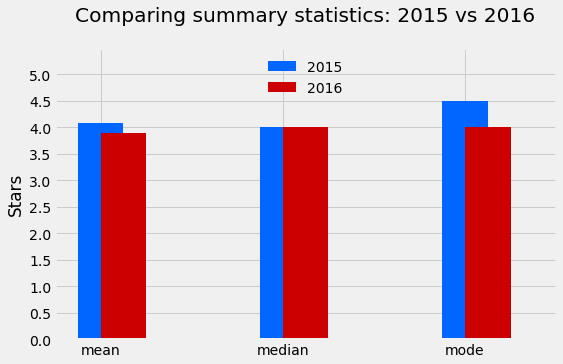

In [156]:
plt.style.use('fivethirtyeight')
summary_stats['2015'].astype(float).plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary_stats['2016'].astype(float).plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()